In [16]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
img=cv2.imread('./test_images/test1.jpg')
img.shape

(520, 780, 3)

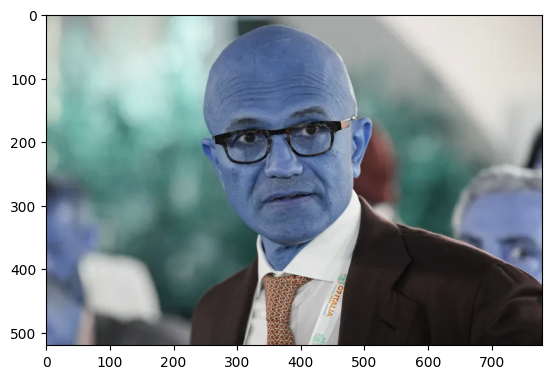

In [18]:
plt.imshow(img)

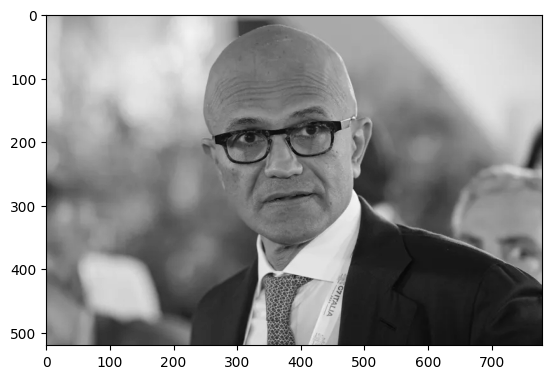

In [19]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape
plt.imshow(gray,cmap='gray')

In [20]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

In [21]:
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[228,  91, 270, 270]])

In [22]:
(x,y,w,h)=faces[0]
(x,y,w,h)

(228, 91, 270, 270)

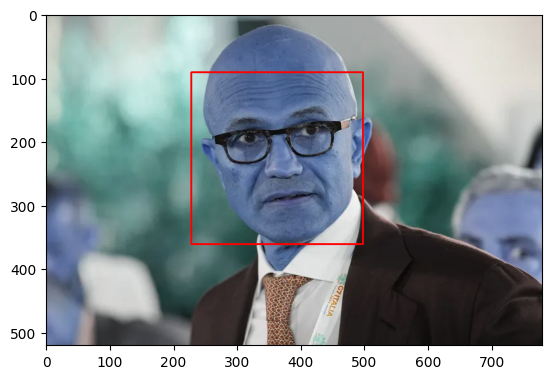

In [23]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img )

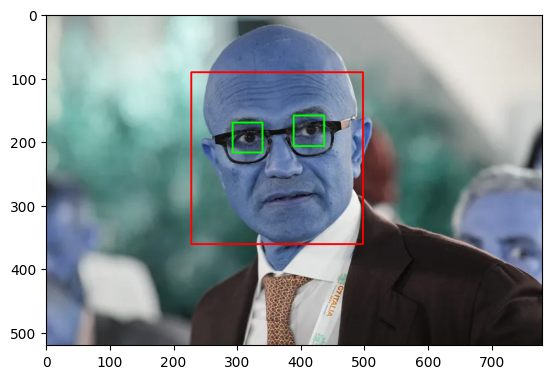

In [24]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(img,cmap='gray')

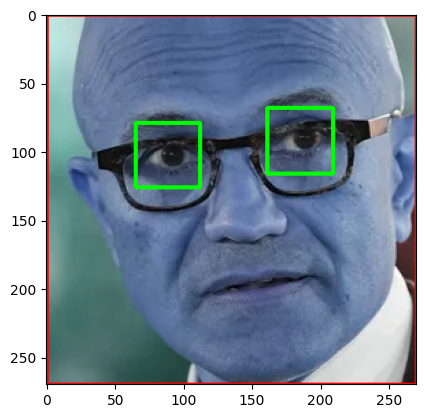

In [25]:
plt.imshow(roi_color)

In [26]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Image not loaded properly:", image_path)
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None


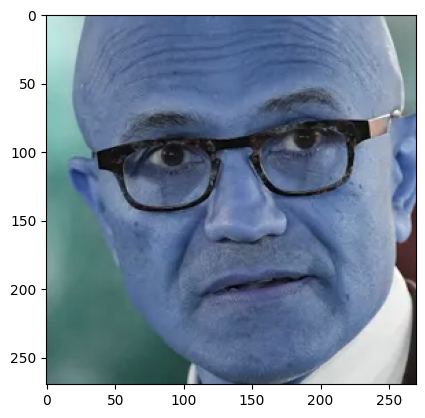

In [27]:
plt.imshow(get_cropped_image_if_2_eyes('./test_images/test1.jpg'))

In [28]:
path_to_data='./dataset/'
path_to_cr_data='./dataset/cropped/'

In [29]:
import os 
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/cropped',
 './dataset/elon_musk',
 './dataset/jeff_bezos',
 './dataset/mukesh_ambani',
 './dataset/satya_nadella',
 './dataset/sundar_pichai']

In [30]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [31]:
cropped_image_dirs=[]
celebrity_file_name_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_name_dict[celebrity_name]=[]

    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+ celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder:',cropped_folder)
            cropped_file_name=celebrity_name+str(count)+'.png'
            cropped_file_path=cropped_folder+'/'+cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count+=1
                

cropped
elon_musk
Generating cropped images in folder: ./dataset/cropped/elon_musk
jeff_bezos
Generating cropped images in folder: ./dataset/cropped/jeff_bezos
Image not loaded properly: <DirEntry 'a555823afe8a428f9d51ab45965a6b09_md.gif'>
Image not loaded properly: <DirEntry 'com_seo_google_widget_crawler_.htm'>
mukesh_ambani
Generating cropped images in folder: ./dataset/cropped/mukesh_ambani
Image not loaded properly: <DirEntry 'com_lookaside_crawler_media_.htm'>
Image not loaded properly: <DirEntry 'com_seo_google_widget_crawler_.htm'>
satya_nadella
Generating cropped images in folder: ./dataset/cropped/satya_nadella
sundar_pichai
Generating cropped images in folder: ./dataset/cropped/sundar_pichai


In [32]:
celebrity_file_name_dict

{'cropped': [],
 'elon_musk': ['./dataset/cropped/elon_musk/elon_musk1.png',
  './dataset/cropped/elon_musk/elon_musk2.png',
  './dataset/cropped/elon_musk/elon_musk3.png',
  './dataset/cropped/elon_musk/elon_musk4.png',
  './dataset/cropped/elon_musk/elon_musk5.png',
  './dataset/cropped/elon_musk/elon_musk6.png',
  './dataset/cropped/elon_musk/elon_musk7.png',
  './dataset/cropped/elon_musk/elon_musk8.png',
  './dataset/cropped/elon_musk/elon_musk9.png',
  './dataset/cropped/elon_musk/elon_musk10.png',
  './dataset/cropped/elon_musk/elon_musk11.png',
  './dataset/cropped/elon_musk/elon_musk12.png',
  './dataset/cropped/elon_musk/elon_musk13.png',
  './dataset/cropped/elon_musk/elon_musk14.png',
  './dataset/cropped/elon_musk/elon_musk15.png',
  './dataset/cropped/elon_musk/elon_musk16.png',
  './dataset/cropped/elon_musk/elon_musk17.png',
  './dataset/cropped/elon_musk/elon_musk18.png',
  './dataset/cropped/elon_musk/elon_musk19.png',
  './dataset/cropped/elon_musk/elon_musk20.png',


In [37]:
class_dict={}
cnt=0
for celebrity_name,training_file in celebrity_file_name_dict.items():
    class_dict[celebrity_name]=cnt
    cnt+=1
class_dict

{'cropped': 0,
 'elon_musk': 1,
 'jeff_bezos': 2,
 'mukesh_ambani': 3,
 'satya_nadella': 4,
 'sundar_pichai': 5}

In [5]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    # Convert to grayscale
    imArray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)

    # Compute wavelet coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Set approximation coefficients to zero
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    # Reconstruct the image
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H = np.uint8(np.clip(imArray_H, 0, 255))

    return imArray_H


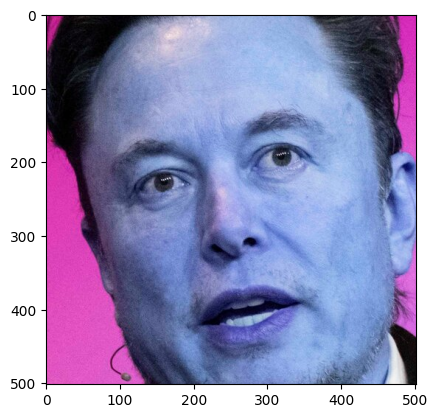

In [39]:
image=cv2.imread('./dataset/cropped/elon_musk/elon_musk10.png')
plt.imshow(image)

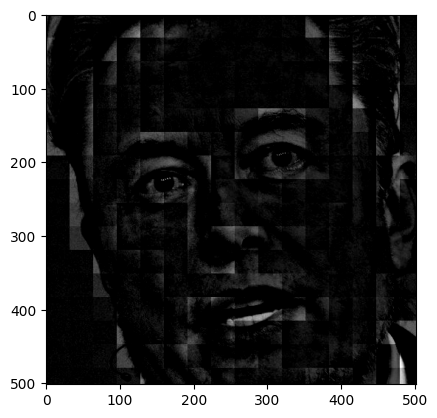

In [40]:
im_har=w2d(image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [49]:
X,y=[],[]
for celebrity_name,training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scaled_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [50]:
len(X)

250

In [69]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(250, 4096)

In [71]:
X.shape

(250, 4096)

In [72]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
X_train.shape

(167, 4096)

In [75]:
model=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

In [76]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7469879518072289

In [77]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.65      0.91      0.75        22
           2       0.88      0.54      0.67        13
           3       0.77      0.81      0.79        21
           4       0.80      0.40      0.53        10
           5       0.82      0.82      0.82        17

    accuracy                           0.75        83
   macro avg       0.78      0.70      0.71        83
weighted avg       0.77      0.75      0.74        83



In [78]:
class_dict

{'cropped': 0,
 'elon_musk': 1,
 'jeff_bezos': 2,
 'mukesh_ambani': 3,
 'satya_nadella': 4,
 'sundar_pichai': 5}

In [86]:
from sklearn import svm 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [82]:
best_estimators

{'svc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(C=1))])}

In [84]:
print(X_train.shape)
print(len(y_train))
print(pd.DataFrame(X_train).isna().sum().sum())  # Any NaNs?
print(pd.Series(y_train).value_counts())         # Class distribution?


(167, 4096)
167
0
1    49
3    40
5    34
2    30
4    14
Name: count, dtype: int64


In [87]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\linea

,model,best_score,best_params
0,svm,0.723708,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.562923,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.813725,{'logisticregression__C': 5}


In [92]:
best_estimators['svm'].score(X_test,y_test)

0.7831325301204819

In [94]:
best_estimators['random_forest'].score(X_test,y_test)

0.5542168674698795

In [93]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8313253012048193

In [95]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, multi_class='auto',
                                     solver='liblinear'))])}

In [96]:
best_clf=best_estimators['logistic_regression']

In [97]:
from sklearn.metrics import confusion_matrix

In [99]:
cm=confusion_matrix(y_test,best_clf.predict(X_test))
print(cm)

[[16  3  2  1  0]
 [ 0 13  0  0  0]
 [ 1  0 15  3  2]
 [ 0  1  0  9  0]
 [ 0  0  0  1 16]]


Text(50.722222222222214, 0.5, 'Truth')

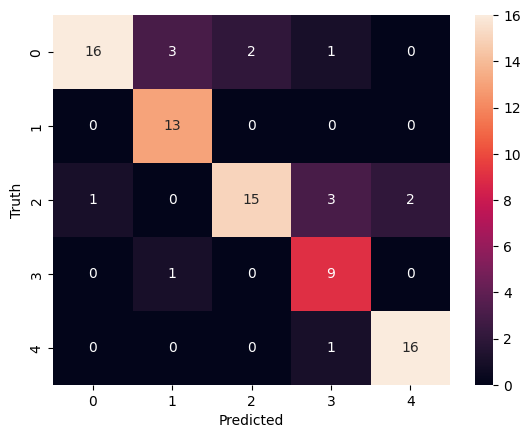

In [102]:
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [105]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [106]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))